<a href="https://colab.research.google.com/github/KacperKaczmarczyk/data-science-bootcamp/blob/main/06_uczenie_glebokie/01_pierwsza_siec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Klasyfikator wieloklasowy - Digit Recognition
### Tensorflow
>Strona biblioteki: [https://www.tensorflow.org/](https://www.tensorflow.org/)  
>Dokumentacja: [https://www.tensorflow.org/api_docs](https://www.tensorflow.org/api_docs)  
>
>Szybko rozwijająca się biblioteka do uczenia maszynowego i uczenia głębokiego rozwijana przez Google.
>
>Aby zainstalować bibliotekę tensorflow, użyj polecenia poniżej:
```
pip install tensorflow
```

### Keras
>Strona biblioteki: [https://keras.io/](https://keras.io/)  
>
>Wysokopoziomowy interfejs do budowy sieci neuronowych. Działa zarówno na Tensorflow, Theano oraz CNTK.
>
>Aby zainstalować bibliotekę keras, użyj polecenia poniżej:
```
pip install keras
```

### Spis treści
1. [Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)](#a1)
1. [Import bibliotek](#a2)
2. [Załadowanie i przygotowanie danych](#a3)
3. [Eksploracja danych](#a4)
4. [Budowa sieci neuronowej](#a5)    
5. [Trenowanie modelu](#a6)
6. [Ocena modelu](#a7)
7. [Predykcja na podstawie modelu](#a8)

![architecture.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/architecture.jpg)
![perceptron.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/perceptron.jpg)
![perceptron_2.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/perceptron_2.jpg)
![multi.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/multi.jpg)
![impl_1.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/impl_1.jpg)


### <a name='a1'></a> Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)

>Celem tego notebook'a jest wstępne zapoznanie się z budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykorzystamy dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi. Jest swego rodzaju benchmarkiem do budowania sieci.
>
> Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów). 



### <a name='a2'></a> Import bibliotek

In [1]:
# Użyj poniższego polecenia jeśli używasz innego środowiska niż Google Colab
# !pip install --upgrade -q tensorflow

# Istnieje tylko w Google Colab, wersja szybsza ;)
%tensorflow_version 2.x  

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.11.0


### <a name='a3'></a> Załadowanie i przygotowanie danych

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [4]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [5]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [6]:
X_train = X_train / 255.
X_test = X_test / 255.

### <a name='a4'></a>  Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

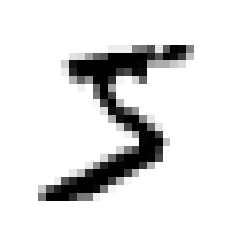

In [7]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

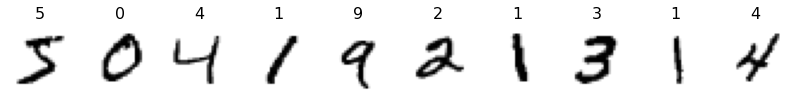

In [11]:
plt.figure(figsize=(14, 14))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='black', fontsize=16)
plt.show()

### <a name='a5'></a>  Budowa sieci neuronowej

In [16]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### <a name='a6'></a> Trenowanie modelu

In [21]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0680 - accuracy: 0.9776
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0578 - accuracy: 0.9815
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0523 - accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0487 - accuracy: 0.9840
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0447 - accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0386 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0375 - accuracy: 0.9877
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0359 - accuracy: 0.9877
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0342 - accuracy: 0.9886
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss:

### <a name='a7'></a> Ocena modelu

In [23]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0767 - accuracy: 0.9805 - 557ms/epoch - 2ms/step


[0.07666145265102386, 0.9804999828338623]

In [24]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.067998,0.977633
1,0.057805,0.981517
2,0.052303,0.983250
3,0.048690,0.984017
4,0.044653,0.985500
5,0.038586,0.987533
6,0.037484,0.987733
7,0.035899,0.987750
8,0.034227,0.988617
9,0.032486,0.988600


In [25]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

### <a name='a8'></a> Predykcja na podstawie modelu

In [26]:
model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


array([[0.000000000152, 0.000000000003, 0.000000025883, ..., 0.9999996     , 0.000000000009, 0.000000006644],
       [0.            , 0.000000013844, 0.99999994    , ..., 0.            , 0.000000000014, 0.            ],
       [0.            , 0.99995965    , 0.000001913971, ..., 0.000032241693, 0.000005409221, 0.000000008049],
       ...,
       [0.000000000001, 0.            , 0.            , ..., 0.000000031965, 0.000000008336, 0.000000191032],
       [0.000000000001, 0.            , 0.            , ..., 0.000000000006, 0.000003662218, 0.            ],
       [0.            , 0.            , 0.000000000301, ..., 0.            , 0.            , 0.            ]],
      dtype=float32)

In [28]:
y_pred = model.predict(X_test)
classes_x = np.argmax(y_pred,axis=1)
classes_x 


313/313 [==============================] - 2s 5ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [30]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(classes_x, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [31]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Int64Index([8, 149, 247, 321, 340, 381, 445, 447, 495, 582], dtype='int64')

In [36]:
y_pred


array([[0.000000000152, 0.000000000003, 0.000000025883, ..., 0.9999996     , 0.000000000009, 0.000000006644],
       [0.            , 0.000000013844, 0.99999994    , ..., 0.            , 0.000000000014, 0.            ],
       [0.            , 0.99995965    , 0.000001913971, ..., 0.000032241693, 0.000005409221, 0.000000008049],
       ...,
       [0.000000000001, 0.            , 0.            , ..., 0.000000031965, 0.000000008336, 0.000000191032],
       [0.000000000001, 0.            , 0.            , ..., 0.000000000006, 0.000003662218, 0.            ],
       [0.            , 0.            , 0.000000000301, ..., 0.            , 0.            , 0.            ]],
      dtype=float32)

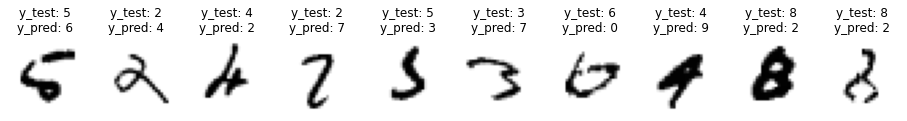

In [43]:
plt.figure(figsize=(16, 16))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title(f'y_test: {y_test[j]}\ny_pred: {classes_x[j]}', color='black', fontsize=12)
plt.show()